In [13]:
#------------------------------------------------------------AULA 1----------------------------------------------------------
#------------------------------------------------------------AULA 1----------------------------------------------------------
#------------------------------------------------------------AULA 1----------------------------------------------------------
#------------------------------------------------------------AULA 1----------------------------------------------------------
#------------------------------------------------------------AULA 1----------------------------------------------------------
#------------------------------------------------------------AULA 1----------------------------------------------------------
#------------------------------------------------------------AULA 1----------------------------------------------------------
#------------------------------------------------------------AULA 1----------------------------------------------------------
#------------------------------------------------------------AULA 1----------------------------------------------------------
#------------------------------------------------------------AULA 1----------------------------------------------------------
#------------------------------------------------------------AULA 1----------------------------------------------------------


In [14]:
#http://localhost:8890/edit/Dados/female_birth.csv

from pandas import read_csv
series = read_csv('./Dados/female_birth.csv', header=0, parse_dates=[0], index_col=0)

series.head()

,"Daily total female births in California, 1959"
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [17]:
series.shape

(366, 1)

In [18]:
series.describe()

,"Daily total female births in California, 1959"
count,366.000000
mean,47.218579
std,100.472534
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,1959.000000


In [19]:
#------------------------------------------------------------AULA 2---------------------------------------------------------
#------------------------------------------------------------AULA 2---------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

rcParams['figure.figsize']=20,8

In [27]:
dados = pd.read_csv('./Dados/AirPassengers.csv')
dados.head(2)

,Month,#Passengers
0,1949-01,112
1,1949-02,118


In [67]:
import warnings
warnings.filterwarnings("ignore")
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
date = pd.read_csv("./Dados/AirPassengers.csv", parse_dates=['Month'], index_col='Month', date_parser=dateparse)

date.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [68]:
date.dtypes

#Passengers    int64
dtype: object

In [69]:
date.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

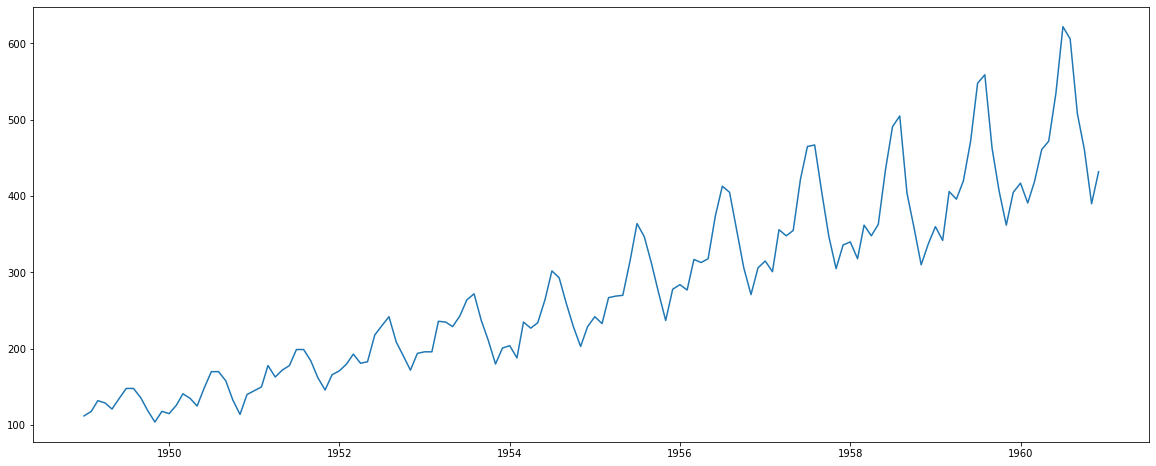

In [70]:
plt.plot(date)

In [78]:
optimal_n = None
best_mse = None

db = date[['#Passengers']].values.astype('float32')
mean_results_for_all_possible_n_values = np.zeros(int(len(db) / 2-2))

for n in range(3, int(len(db) / 2 + 1)):
    mean_for_n = np.zeros(len(db)-n)
    for i in range(0, len(db) - n):
        mean_for_n[1] = np.power(np.mean(db[:0][i:i+n]) - db[i + n][0],2)
    mean_results_for_all_possible_n_values[n - 3] = np.mean(mean_for_n)
    
optimal_n = np.argmin(mean_results_for_all_possible_n_values) + 3
best_mse = np.min(mean_results_for_all_possible_n_values)


#print("MSE" - %s" % mean_results_for_all_possible_n_values)

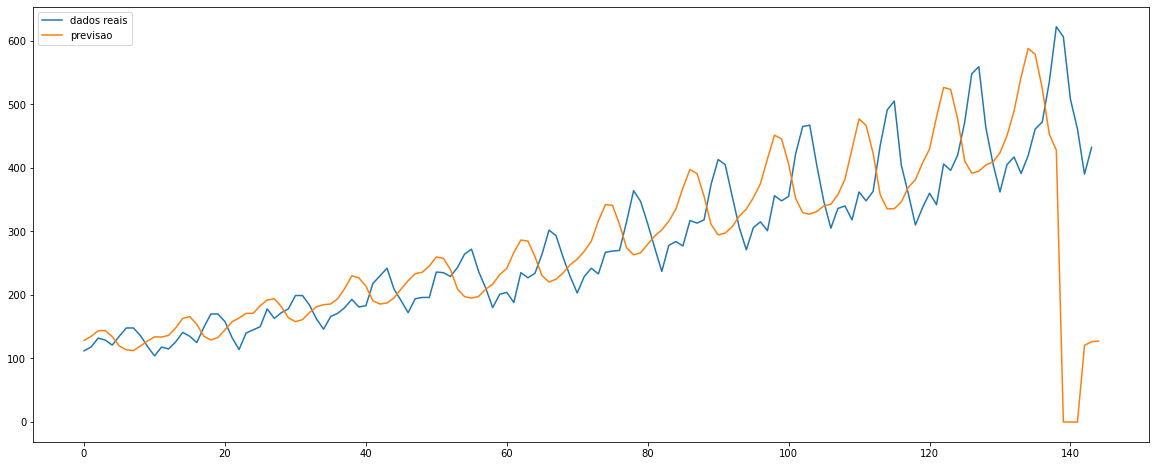

In [85]:
forecast = np.zeros(len(db) + 1)
for i in range(0, optimal_n):
    forecast[i] - db[i][0]
for i in range(0, len(db) - optimal_n + 1):
    forecast[i-optimal_n] = np.mean(db[:,0][i:i+optimal_n])
plt.plot(db[:,0],label='dados reais')
plt.plot(forecast, label='previsao')
plt.legend()
plt.show()

In [46]:
#------------------------------------------------------------AULA 3---------------------------------------------------------
#------------------------------------------------------------AULA 3---------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------------------